Some installation to consider before performing Profiling 

!pip uninstall matplotlib pandas pandas_profiling ydata_profiling -y
pip install ydata_profiling
pip install pandas matplotlib

!pip uninstall scikit-learn -y
pip install scikit-learn

!pip install --upgrade --no-cache-dir scikit-learn

#### Read  red-wine.csv into Python as a data frame, use a pandas profiling tool (https://github.com/pandas-profiling/pandas-profiling) to create an HTML file, and paste a screenshot of the HTML file here (10 points)

In [4]:
import pandas as pd
import ydata_profiling as yp 

import matplotlib.pyplot as plt

# Ensure this package is installed and available

file_path = './red_wine.csv'  # Ensure the file is in your working directory

try:
    # Load the data
    df = pd.read_csv(file_path, low_memory=False)
except FileNotFoundError:
    print(f"No such file or directory: '{file_path}'")
except pd.errors.EmptyDataError:
    print(f"No data in file: '{file_path}'")
except pd.errors.ParserError:
    print(f"Error parsing file: '{file_path}'")
else:
    try:
        # Generate the profiling report
        profile = yp.ProfileReport(df, title='Profiling Report', explorative=True)

        # Save the report
        profile.to_file("red_wine_profiling_report.html")
    except Exception as e:
        print(f"An error occurred while generating the profile report: {str(e)}")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Fit a model using each of the following methods and report the performance metrics of 10-fold cross-validation using red-wine.csv as the training set (25 points)

In [6]:
import pandas as pd

# Load the red wine dataset
red_wine_df = pd.read_csv('./red_wine.csv')

# Display the first few rows to understand its structure
red_wine_df.head()



,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low


In [7]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the 'type' column to numerical values (0 for 'low' and 1 for 'high')
le = LabelEncoder()
red_wine_df['type'] = le.fit_transform(red_wine_df['type'])

# Define features (X) and target (y)
X = red_wine_df.drop('type', axis=1)
y = red_wine_df['type']

# Display the first few rows after encoding and splitting
X.head(), y.head()


(   citric acid  sulphates  alcohol
 0         0.49       0.63      8.0
 1         0.66       0.57      8.3
 2         0.23       0.44      8.5
 3         0.44       0.84      8.6
 4         0.08       0.50      8.7,
 0    1
 1    1
 2    0
 3    1
 4    1
 Name: type, dtype: int64)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Initialize models
baseline = DummyClassifier(strategy='most_frequent', random_state=42)
lr = LogisticRegression(random_state=42)
nb = GaussianNB()
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)  # Enable probability estimates for AUC
rf = RandomForestClassifier(random_state=42)

# List of models
models = [baseline, lr, nb, dt, svm, rf]
model_names = ['Baseline', 'LR', 'NB', 'DT', 'SVM', 'RF']

# Initialize performance metric dictionaries
auc_scores = {}
accuracy_scores = {}

# Scoring functions
scoring_functions = {'AUC': make_scorer(roc_auc_score, needs_proba=True),
                     'Accuracy': make_scorer(accuracy_score)}

# Perform 10-fold cross-validation for each model
for model, name in zip(models, model_names):
    auc = np.mean(cross_val_score(model, X, y, cv=10, scoring=scoring_functions['AUC']))
    accuracy = np.mean(cross_val_score(model, X, y, cv=10, scoring=scoring_functions['Accuracy']))
    auc_scores[name] = auc
    accuracy_scores[name] = accuracy

# Create a DataFrame to display the results
performance_df = pd.DataFrame([auc_scores, accuracy_scores], index=['AUC', 'Accuracy'])

performance_df


,Baseline,LR,NB,DT,SVM,RF
AUC,0.500000,0.879902,0.895408,0.749639,0.868920,0.899050
Accuracy,0.528887,0.784785,0.821627,0.751512,0.535844,0.805808


### Plot the ROC curve of the Random Forest classifier from the Python package, and paste a screenshot of your ROC curve here (10 points)

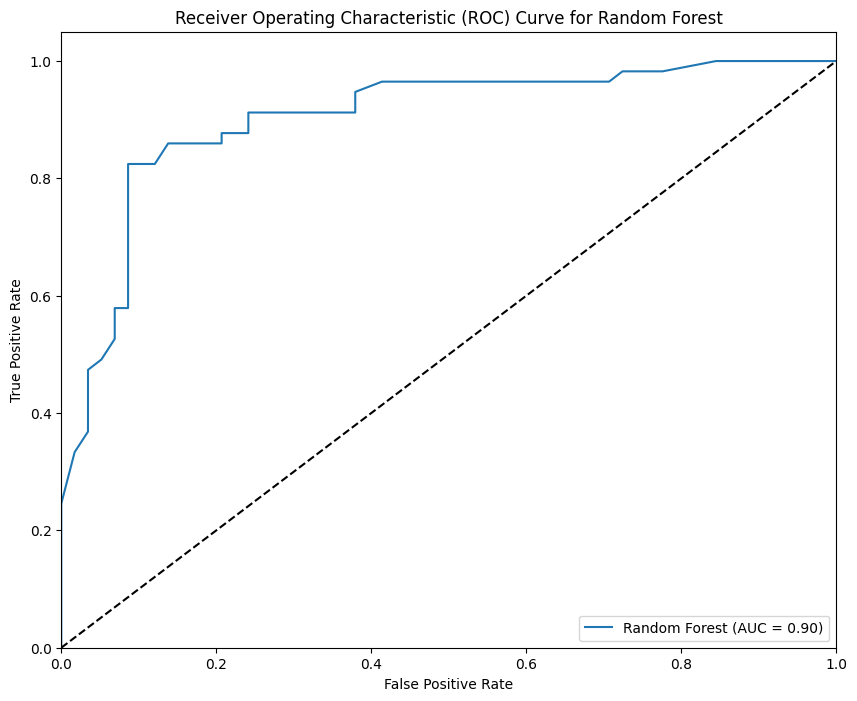

In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get predicted probabilities
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()



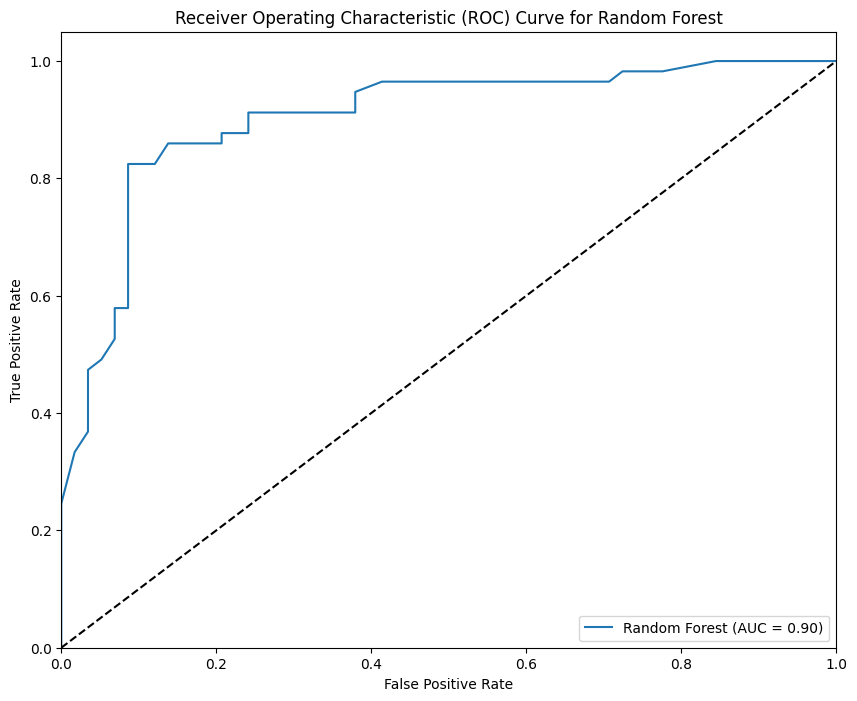

In [10]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get predicted probabilities
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()


#### Using the best model obtained above in Q2 running the model on white-wine.csv and reporting the AUC score, comment on the performance. (5 points)

In [11]:
# Load the white wine dataset
white_wine_df = pd.read_csv('./white_wine.csv')

# Encode the 'type' column to numerical values (0 for 'low' and 1 for 'high')
white_wine_df['type'] = le.transform(white_wine_df['type'])

# Define features (X_white) and target (y_white)
X_white = white_wine_df.drop('type', axis=1)
y_white = white_wine_df['type']

# Fit the Random Forest model on the red wine dataset
rf.fit(X, y)

# Predict the probabilities for the white wine dataset
y_white_proba = rf.predict_proba(X_white)[:, 1]

# Calculate the AUC score for the white wine dataset
auc_white = roc_auc_score(y_white, y_white_proba)
print('AUC is : ',auc_white)


AUC is :  0.973963355834137
